In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "creditcard.csv"

creditcard = pd.read_csv(url)

creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:

print(creditcard.shape)

(284807, 31)


In [4]:
X = creditcard.drop(labels='Class', axis=1)
Y = creditcard['Class']

X.shape, Y.shape

((284807, 30), (284807,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [14]:

#param_grid = {'max_depth': np.arange(2,5), 'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
#Create a based model
#rfclf = GridSearchCV(RandomForestClassifier(), param_grid,cv=2)
#rfclf = rfclf.fit(xtrain,ytrain)
#rfclf.best_params_
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(xtrain, ytrain)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [15]:

# printing the optimal accuracy score and hyperparameters
grid_search.best_params_

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [17]:

rfgmodel = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [18]:
# Fit the model
rfgmodel.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [19]:
predictions = rfgmodel.predict(xtest)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[85326   117]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.71      0.77       136

    accuracy                           1.00     85443
   macro avg       0.91      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [22]:
tn, fp, fn, tp = confusion_matrix(ytest,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,97,39
Not Fraud,20,85287


<AxesSubplot:>

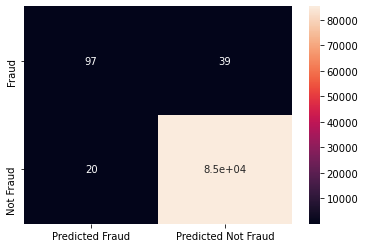

In [23]:
sns.heatmap(conf_matrix, annot=True)

In [24]:
rf_accuracy = accuracy_score(ytest, predictions)
rf_accuracy

0.9993094811745842

In [25]:
rf_precision = precision_score(ytest, predictions)
rf_precision

0.8290598290598291

In [26]:
rf_recall = recall_score(ytest, predictions)
rf_recall

0.7132352941176471

In [27]:
from sklearn.metrics import f1_score
rf_f1 = f1_score(ytest, predictions)
rf_f1

0.766798418972332

In [28]:
results_testset = pd.DataFrame([['RandomForest', rf_accuracy,1-rf_recall ,rf_recall, rf_precision,rf_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999309,0.286765,0.713235,0.82906,0.766798


In [30]:
lr_pred_test_prob = rfgmodel.predict_proba(xtest)[:, 1]

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [33]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9670759640440514

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

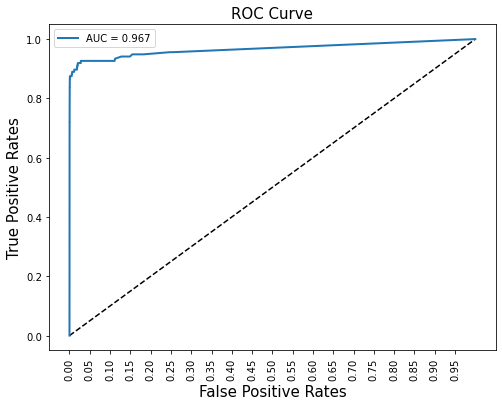

In [35]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

# Balanced dataset

In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
X_train_ns,y_train_ns=os.fit_resample(xtrain,ytrain)

In [38]:
y_train_ns.value_counts()

1    199008
0    199008
Name: Class, dtype: int64

In [39]:
dataset=X_train_ns

In [40]:
dataset['Class']=y_train_ns

In [41]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
test_X=xtest
test_Y=ytest

In [43]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_ns, y_train_ns)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [44]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 1.0 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [48]:
rfgmodel = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [52]:
# Fit the model
rfgmodel.fit(x, y)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [53]:
predictions = rfgmodel.predict(xtest)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[84607   836]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.15      0.92      0.26       136

    accuracy                           0.99     85443
   macro avg       0.57      0.96      0.63     85443
weighted avg       1.00      0.99      0.99     85443



In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [56]:
tn, fp, fn, tp = confusion_matrix(test_Y,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,125,11
Not Fraud,711,84596


In [57]:
rf_accuracy = accuracy_score(test_Y, predictions)
rf_accuracy

0.9915499221703358

In [58]:
rf_precision = precision_score(test_Y, predictions)
rf_precision

0.14952153110047847

In [59]:
rf_recall = recall_score(test_Y, predictions)
rf_recall

0.9191176470588235

In [60]:
from sklearn.metrics import f1_score
rf_f1 = f1_score(ytest, predictions)
rf_f1

0.25720164609053503

In [61]:
results_testset = pd.DataFrame([['RandomForest', rf_accuracy,1-rf_recall ,rf_recall, rf_precision,rf_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99155,0.080882,0.919118,0.149522,0.257202


In [62]:
lr_pred_test_prob = rfgmodel.predict_proba(test_X)[:, 1]

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
fpr, tpr, threshold = roc_curve(test_Y, lr_pred_test_prob)

In [65]:
lr_auc = roc_auc_score(test_Y, lr_pred_test_prob)
lr_auc

0.9820109497255242

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

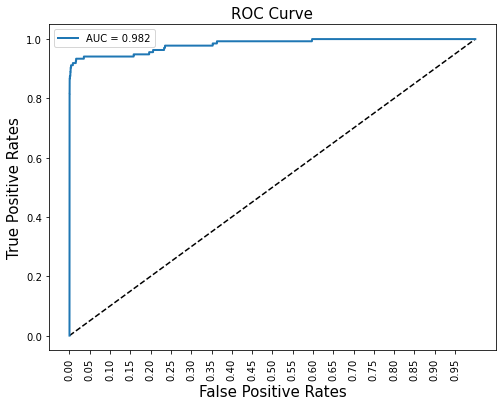

In [67]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)